--- Loading pre-computed prediction feature data ---
 Loaded 52422 segments with 380 features each.

Prediction Class Imbalance Ratio (Interictal:Preictal): 5.87 : 1
Data split into 41937 training samples and 10485 test samples.

--- Training XGBoost Classifier on Prediction Features ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:23:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


---  Training Complete ---

--- Evaluating Prediction Model Performance on Test Set ---

ROC AUC Score: 0.9342
Best Threshold for F1: 0.4167
Best F1 Score: 0.6696

Classification Report with Optimized Threshold:
                precision    recall  f1-score   support

Interictal (0)       0.94      0.95      0.95      8958
  Preictal (1)       0.69      0.65      0.67      1527

      accuracy                           0.91     10485
     macro avg       0.82      0.80      0.81     10485
  weighted avg       0.90      0.91      0.91     10485


Confusion Matrix (Optimized for F1-Score):


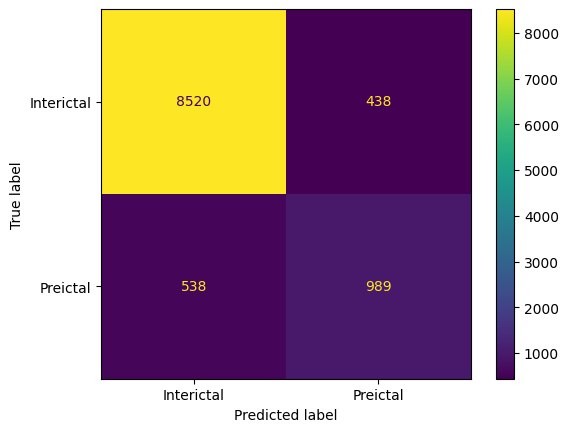

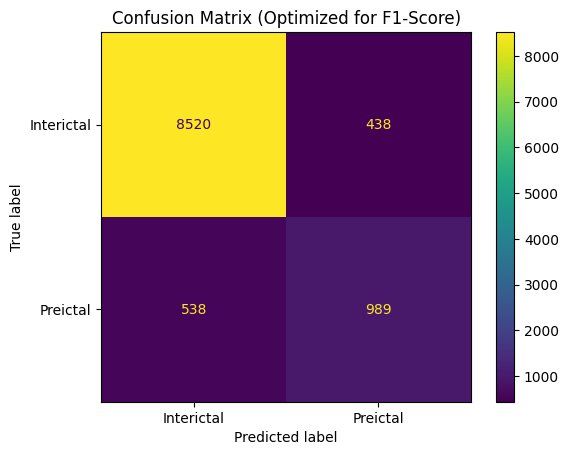


--- ROC Curve Visualization ---


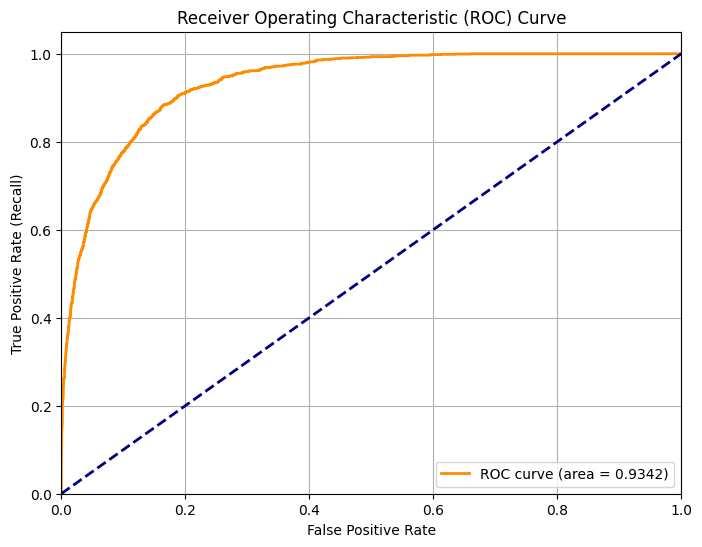

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, roc_auc_score, ConfusionMatrixDisplay,
    f1_score, precision_recall_curve, roc_curve, auc
)
import matplotlib.pyplot as plt

# --- 1. Load the Pre-computed PREDICTION Dataset ---
print("--- Loading pre-computed prediction feature data ---")
dataset_path = 'TUH_dataset_features_v2.npz' 

data = np.load(dataset_path)
# --- THIS IS THE KEY CHANGE ---
X = data['X_pred']
y = data['y_pred']
# ---

print(f" Loaded {X.shape[0]} segments with {X.shape[1]} features each.")

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nPrediction Class Imbalance Ratio (Interictal:Preictal): {scale_pos_weight:.2f} : 1")

# --- 3. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} test samples.")

# --- 4. Initialize and Train the Tuned XGBoost Model ---
print("\n--- Training XGBoost Classifier on Prediction Features ---")

model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=1600,
    max_depth=7,
    learning_rate=0.03,
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=1,                    
    min_child_weight=4,
    reg_alpha=0.01,             
    reg_lambda=1.1
)

model.fit(X_train, y_train)
print("---  Training Complete ---")

# --- 5. Evaluate the Model's Performance ---
print("\n--- Evaluating Prediction Model Performance on Test Set ---")
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# --- 6. Optimize F1 Score by threshold ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

print(f"\nROC AUC Score: {roc_auc:.4f}")
print(f"Best Threshold for F1: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_opt, target_names=['Interictal (0)', 'Preictal (1)']))

# --- 7. Confusion Matrix ---
print("\nConfusion Matrix (Optimized for F1-Score):")
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt, display_labels=['Interictal', 'Preictal'])
disp.plot()
plt.title("Confusion Matrix (Optimized for F1-Score)")
plt.show()

# --- 8. Plot the ROC Curve ---
print("\n--- ROC Curve Visualization ---")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

--- Loading pre-computed LEAN prediction feature data ---
 Loaded 25434 segments with 114 features each.

Class Imbalance Ratio (Interictal:Preictal): 1.64 : 1
Data split into 20347 training samples and 5087 test samples.

--- Training XGBoost Classifier on Lean Prediction Features ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


---  Training Complete ---

--- Evaluating Prediction Model Performance (Lean Set) ---

ROC AUC Score: 0.9757
Best Threshold for F1: 0.4484
Best F1 Score: 0.8919

Classification Report with Optimized Threshold:
                precision    recall  f1-score   support

Interictal (0)       0.95      0.91      0.93      3163
  Preictal (1)       0.86      0.93      0.89      1924

      accuracy                           0.91      5087
     macro avg       0.91      0.92      0.91      5087
  weighted avg       0.92      0.91      0.92      5087


Confusion Matrix (Optimized for F1-Score):


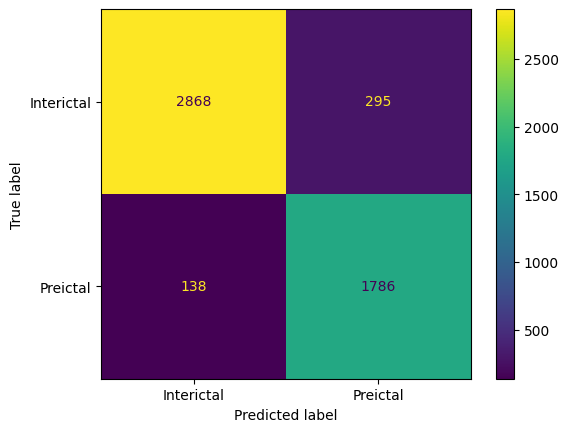

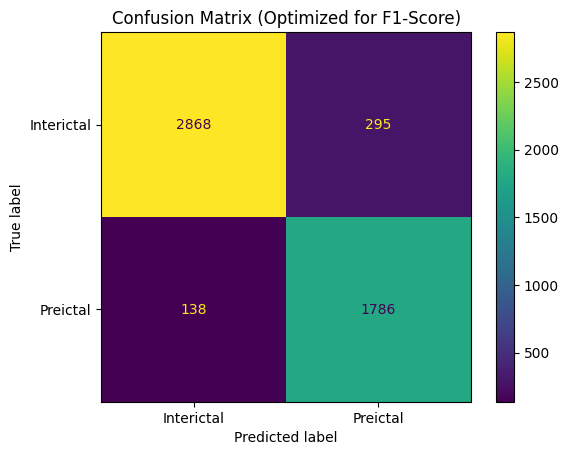


--- ROC Curve Visualization ---


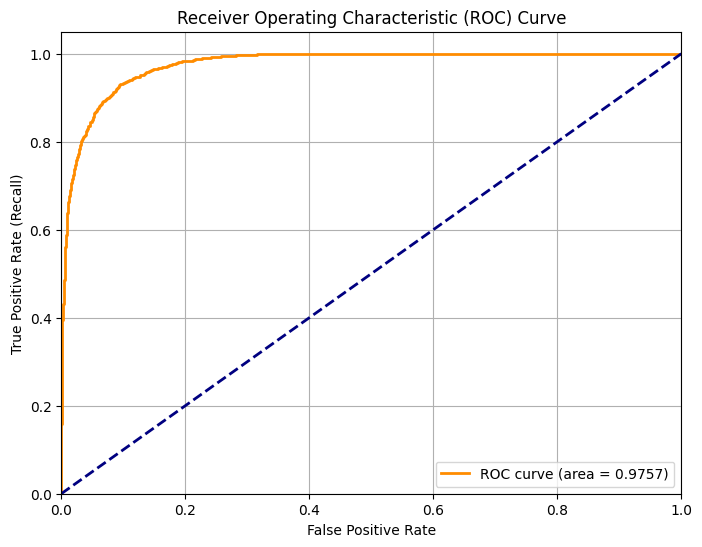

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, roc_auc_score, ConfusionMatrixDisplay,
    f1_score, precision_recall_curve, roc_curve, auc
)
import matplotlib.pyplot as plt

# --- 1. Load the NEW Lean Prediction Dataset ---
print("--- Loading pre-computed LEAN prediction feature data ---")
dataset_path = 'TUH_dataset_lean_prediction_features.npz' 

data = np.load(dataset_path)
# Load the prediction arrays
X = data['X_pred']
y = data['y_pred']
print(f" Loaded {X.shape[0]} segments with {X.shape[1]} features each.")

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nClass Imbalance Ratio (Interictal:Preictal): {scale_pos_weight:.2f} : 1")

# --- 3. Split Data into Training and Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} test samples.")

# --- 4. Initialize and Train the Tuned XGBoost Model ---
# We'll use the same strong hyperparameters we found earlier
print("\n--- Training XGBoost Classifier on Lean Prediction Features ---")
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=1600,
    max_depth=7,
    learning_rate=0.03,
    subsample=0.8,              
    colsample_bytree=0.8,       
    gamma=1,                    
    min_child_weight=4,
    reg_alpha=0.01,             
    reg_lambda=1.1
)

model.fit(X_train, y_train)
print("---  Training Complete ---")

# --- 5. Evaluate the Model's Performance ---
print("\n--- Evaluating Prediction Model Performance (Lean Set) ---")
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# --- 6. Optimize F1 Score by threshold ---
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

print(f"\nROC AUC Score: {roc_auc:.4f}")
print(f"Best Threshold for F1: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_opt, target_names=['Interictal (0)', 'Preictal (1)']))

# --- 7. Confusion Matrix ---
print("\nConfusion Matrix (Optimized for F1-Score):")
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt, display_labels=['Interictal', 'Preictal'])
disp.plot()
plt.title("Confusion Matrix (Optimized for F1-Score)")
plt.show()

# --- 8. Plot the ROC Curve ---
print("\n--- ROC Curve Visualization ---")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

--- Loading pre-computed LEAN prediction feature data ---
 Loaded 25434 segments with 114 features each.

Class Imbalance Ratio (Interictal:Preictal): 1.64 : 1
Set up 5-Fold Stratified Cross-Validation.

--- Starting K-Fold Cross-Validation and Training ---

--- Processing Fold 1/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 - ROC AUC: 0.9789 | Optimal F1: 0.8995 @ Threshold: 0.4460

--- Processing Fold 2/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 - ROC AUC: 0.9778 | Optimal F1: 0.8946 @ Threshold: 0.4584

--- Processing Fold 3/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 - ROC AUC: 0.9772 | Optimal F1: 0.8953 @ Threshold: 0.5469

--- Processing Fold 4/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 - ROC AUC: 0.9775 | Optimal F1: 0.8975 @ Threshold: 0.4534

--- Processing Fold 5/5 ---


c:\Users\siddh\miniconda3\envs\pyt\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 - ROC AUC: 0.9777 | Optimal F1: 0.8926 @ Threshold: 0.5629

--- Aggregated K-Fold Performance (Mean ± Std Dev) ---
Overall ROC AUC: 0.9778 ± 0.0006
Overall Optimal F1 Score: 0.8959 ± 0.0024

Classification Report (Last Fold Test Set, Optimized Threshold):
                precision    recall  f1-score   support

Interictal (0)       0.94      0.93      0.93      3163
  Preictal (1)       0.89      0.89      0.89      1923

      accuracy                           0.92      5086
     macro avg       0.91      0.91      0.91      5086
  weighted avg       0.92      0.92      0.92      5086


--- Generating Plots for the Last Fold ---


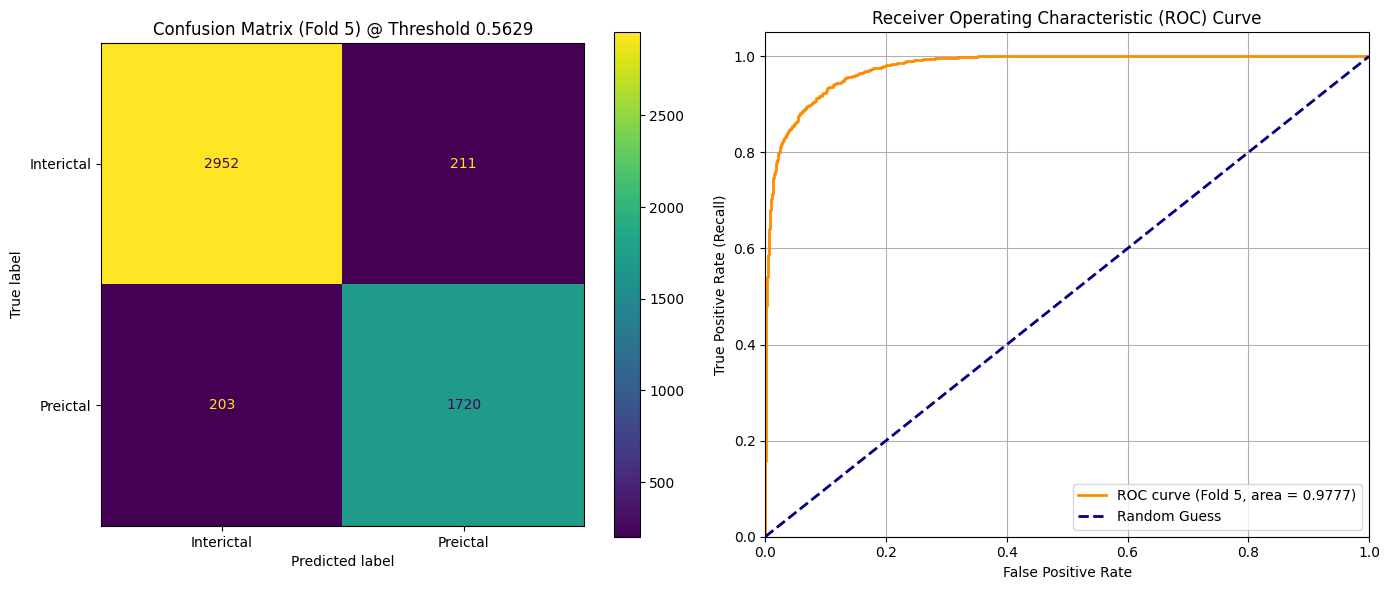

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, roc_auc_score, ConfusionMatrixDisplay,
    precision_recall_curve, roc_curve, f1_score
)
import matplotlib.pyplot as plt

# --- 1. Load the NEW Lean Prediction Dataset ---
print("--- Loading pre-computed LEAN prediction feature data ---")
dataset_path = 'TUH_dataset_lean_prediction_features.npz' 

try:
    data = np.load(dataset_path)
    X = data['X_pred']
    y = data['y_pred']
    print(f" Loaded {X.shape[0]} segments with {X.shape[1]} features each.")
except FileNotFoundError:
    print(f"🚨 Error: Dataset file '{dataset_path}' not found.")
    print("Please ensure the data file is present to run the analysis.")
    exit()

# --- 2. Calculate Class Weight for Imbalance ---
non_seizure_count = np.sum(y == 0)
seizure_count = np.sum(y == 1)
scale_pos_weight = non_seizure_count / seizure_count
print(f"\nClass Imbalance Ratio (Interictal:Preictal): {scale_pos_weight:.2f} : 1")

# --- 3. Setup Cross-Validation ---
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
print(f"Set up {N_SPLITS}-Fold Stratified Cross-Validation.")

# Initialize lists to store metrics across all folds
roc_auc_list = []
f1_opt_list = []
# Variables to store data from the last or best fold for plotting
last_y_test, last_y_pred_proba, last_y_pred_opt = None, None, None
last_best_threshold = None


# --- 4. Cross-Validation Loop ---
print("\n--- Starting K-Fold Cross-Validation and Training ---")

for fold_idx, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\n--- Processing Fold {fold_idx + 1}/{N_SPLITS} ---")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize a fresh model for each fold
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=1600,
        max_depth=7,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        min_child_weight=4,
        reg_alpha=0.01,
        reg_lambda=1.1
    )

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate performance
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    current_roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_list.append(current_roc_auc)

    # Optimize F1 Score by threshold
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    # Calculate F1 scores (avoiding division by zero)
    f1_scores = np.where((precision + recall) > 0, 2 * (precision * recall) / (precision + recall), 0)
    best_idx = f1_scores.argmax()
    best_threshold = thresholds[best_idx]
    current_best_f1 = f1_scores[best_idx]
    f1_opt_list.append(current_best_f1)
    
    # Store results from this fold for plotting
    last_y_test = y_test
    last_y_pred_proba = y_pred_proba
    last_best_threshold = best_threshold
    last_y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

    print(f"Fold {fold_idx + 1} - ROC AUC: {current_roc_auc:.4f} | Optimal F1: {current_best_f1:.4f} @ Threshold: {best_threshold:.4f}")

# --- 5. Aggregate and Report Final Metrics ---
print("\n--- Aggregated K-Fold Performance (Mean ± Std Dev) ---")
mean_roc_auc = np.mean(roc_auc_list)
std_roc_auc = np.std(roc_auc_list)
mean_f1 = np.mean(f1_opt_list)
std_f1 = np.std(f1_opt_list)

print(f"Overall ROC AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")
print(f"Overall Optimal F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")

# --- 6. Classification Report for the Last Fold (Representative) ---
print("\nClassification Report (Last Fold Test Set, Optimized Threshold):")
print(classification_report(last_y_test, last_y_pred_opt, target_names=['Interictal (0)', 'Preictal (1)']))


# --- 7. Generate and Display Plots (Using the Last Fold's Results) ---

print("\n--- Generating Plots for the Last Fold ---")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Confusion Matrix ---
ConfusionMatrixDisplay.from_predictions(last_y_test, last_y_pred_opt, ax=axes[0], 
                                        display_labels=['Interictal', 'Preictal'])
axes[0].set_title(f'Confusion Matrix (Fold {N_SPLITS}) @ Threshold {last_best_threshold:.4f}')

# --- Plot 2: ROC AUC Curve ---
fpr, tpr, _ = roc_curve(last_y_test, last_y_pred_proba)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (Fold {N_SPLITS}, area = {roc_auc_list[-1]:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
             label='Random Guess')

axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate (Recall)')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.tight_layout()
plt.show()